In [43]:
#importing libraries

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
os.chdir (r"C:\Users\Ewuraa\Downloads")

In [8]:
data = pd.read_csv('weatherAUS.csv')

In [9]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [44]:
#cleaning data

In [14]:
data1=data.fillna(0)

In [15]:
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [16]:
data1['RainToday']=np.where((data1.RainToday==0),'Yes',data1.RainToday)

In [17]:
data1['RainToday']

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainToday, Length: 145460, dtype: object

In [18]:
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [19]:
data1.tail(100)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145360,2017-03-18,Uluru,20.3,38.8,0.0,0.0,0.0,ENE,37.0,E,...,29.0,14.0,1015.7,1011.0,0.0,0.0,28.6,37.1,No,No
145361,2017-03-19,Uluru,19.2,39.5,0.0,0.0,0.0,ENE,35.0,E,...,23.0,10.0,1012.4,1007.6,0.0,0.0,28.7,37.8,No,No
145362,2017-03-20,Uluru,17.5,39.7,0.0,0.0,0.0,SSW,48.0,S,...,22.0,9.0,1009.5,1005.6,0.0,0.0,26.9,38.6,No,No
145363,2017-03-21,Uluru,21.8,38.9,0.0,0.0,0.0,S,37.0,SE,...,42.0,15.0,1011.2,1006.8,0.0,0.0,26.3,36.8,No,No
145364,2017-03-22,Uluru,23.1,39.9,0.0,0.0,0.0,ENE,37.0,E,...,33.0,16.0,1012.3,1007.7,0.0,0.0,28.1,37.8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [20]:
data1['RainTomorrow']=np.where((data1.RainTomorrow==0),'Yes',data1.RainTomorrow)
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [21]:
data1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,3.107787,3.957069,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405
std,6.482693,7.407808,8.389771,4.163070,4.680785,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000
50%,11.900000,22.500000,0.000000,1.600000,0.100000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<function matplotlib.pyplot.show(close=None, block=None)>

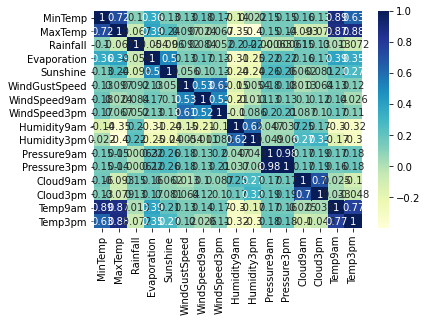

In [22]:
sns.heatmap(data1.corr(),cmap='YlGnBu',  annot = True)
plt.show

<AxesSubplot:>

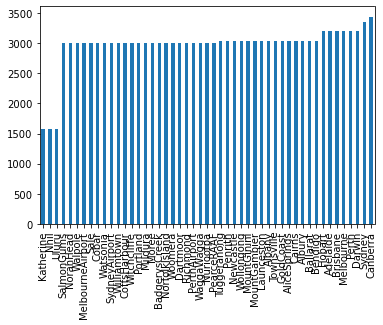

In [24]:
data1.Location.value_counts().sort_values().plot(kind = 'bar')

In [25]:
x = data1[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]
y = data1[['RainToday']]

In [26]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
0,Albury,13.4,22.9,0.6,0.0,0.0
1,Albury,7.4,25.1,0.0,0.0,0.0
2,Albury,12.9,25.7,0.0,0.0,0.0
3,Albury,9.2,28.0,0.0,0.0,0.0
4,Albury,17.5,32.3,1.0,0.0,0.0


In [27]:
y.head()

,RainToday
0,No
1,No
2,No
3,No
4,No


In [28]:
le = preprocessing.LabelEncoder()
x['Location'] = le.fit_transform(x.Location.values)

<ipython-input-28-68f2199172b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Location'] = le.fit_transform(x.Location.values)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.7, random_state =0)

In [30]:
print('X_train: ', X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (43638, 6)
X_test:  (101822, 6)
y_train:  (43638, 1)
y_test:  (101822, 1)


In [32]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
#Predict Model Score

In [34]:
model.score(x,y)*100

98.1293826481507

In [35]:
#Confusion Matrix

In [36]:
y_pred= model.predict(X_test)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[75833,  1474],
       [ 1217, 23298]], dtype=int64)

In [42]:
#Model Prediction

In [41]:
model.predict([[121,4,1,35,18,0]])

array(['Yes'], dtype=object)

In [45]:
#pie chart

<AxesSubplot:title={'center':'RAIN TOMORROW'}, ylabel='Location'>

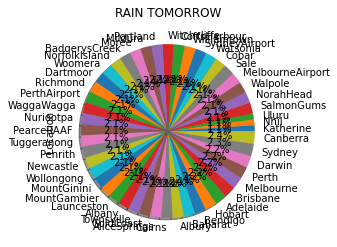

In [53]:
data1.Location.value_counts().sort_values().plot(kind = 'pie' ,autopct='%1.1f%%', shadow=True, title = 'RAIN TOMORROW')

<AxesSubplot:title={'center':'RAIN TODAY'}, ylabel='RainToday'>

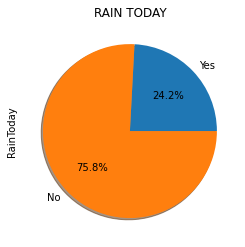

In [47]:
data1.RainToday.value_counts().sort_values().plot(kind = 'pie', autopct='%1.1f%%', shadow=True, title = 'RAIN TODAY')

<AxesSubplot:title={'center':'RAIN TOMORROW'}, ylabel='RainTomorrow'>

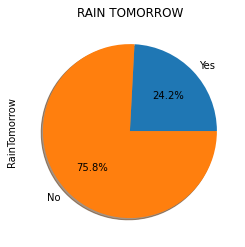

In [54]:
data1.RainTomorrow.value_counts().sort_values().plot(kind = 'pie' ,autopct='%1.1f%%', shadow=True, title = 'RAIN TOMORROW')